In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

In [2]:
imbook = cv2.imread('./book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)

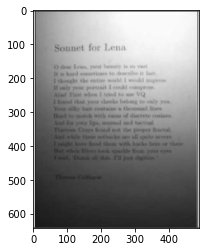

In [3]:
plt.imshow(imbook,cmap = "gray")

In [16]:
def my_gaussian_filter(img, sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2  
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian[x+m, y+n] = (1/x1)*x2
    first_half = gaussian.shape[0]//2
    second_half = gaussian.shape[1]//2
    img1 = np.zeros([img.shape[0] + gaussian.shape[0],img.shape[1] + gaussian.shape[1]])
    img1[first_half:first_half + img.shape[0],second_half:second_half + img.shape[1]] = img
    img1[0:first_half, second_half:second_half+img.shape[1]] = img[0:first_half,:]
    img1[first_half:first_half+img.shape[0], 0:second_half] = img[:,0:second_half]
    img1[img.shape[0] + first_half + 1:, second_half:second_half+img.shape[1]] = img[(img.shape[0] - first_half):,:]
    img1[first_half:first_half+img.shape[0],img.shape[1] + second_half + 1:] = img[:,img.shape[1] - second_half:]
    img1[0:first_half,0:second_half] = img[0:first_half,0:second_half]
    img1[0:first_half:,second_half + img.shape[1] + 1:] = img[0:first_half, img.shape[1] - second_half:]
    img1[first_half + img.shape[0] + 1:,0:second_half] = img[img.shape[0] - first_half :, 0:second_half]
    img1[first_half + img.shape[0] + 1:,second_half + img.shape[1] + 1:] = img[img.shape[0] - first_half :, img.shape[1] - second_half:]
    res = np.zeros(img1.shape)
    for k in range(img1.shape[0] - gaussian.shape[0]):
        for l in range(img1.shape[1] - gaussian.shape[1]):                   
            res[k,l] = np.sum(gaussian * img1[k:k+ gaussian.shape[0], l:l + gaussian.shape[1]])
    res = res[:img.shape[0],:img.shape[1]]                                                                                            
    return res, img1

Добавляем края изображения, для того, чтобы размер не изменился после применения свертки


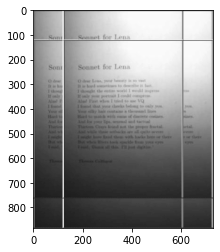

In [17]:
fltbook, updatedImage = my_gaussian_filter(imbook, 30)
print("Добавляем края изображения, для того, чтобы размер не изменился после применения свертки")
plt.imshow(updatedImage,cmap = "gray")


Результат my_gaussian_filter


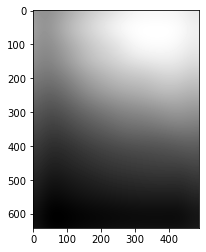

In [18]:
print("Результат my_gaussian_filter")
plt.imshow(fltbook,cmap = "gray")

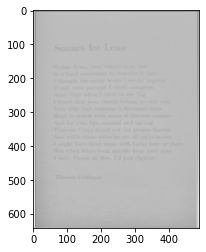

In [19]:
res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')

For comparison Filter view from original code 
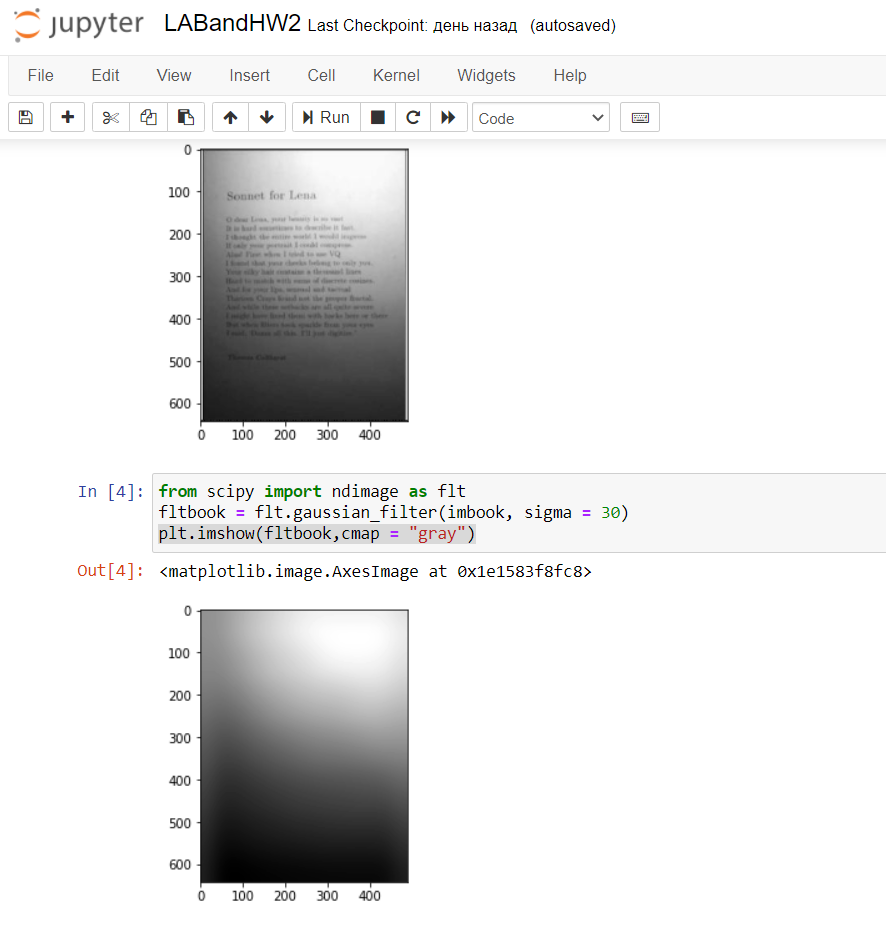

Result image 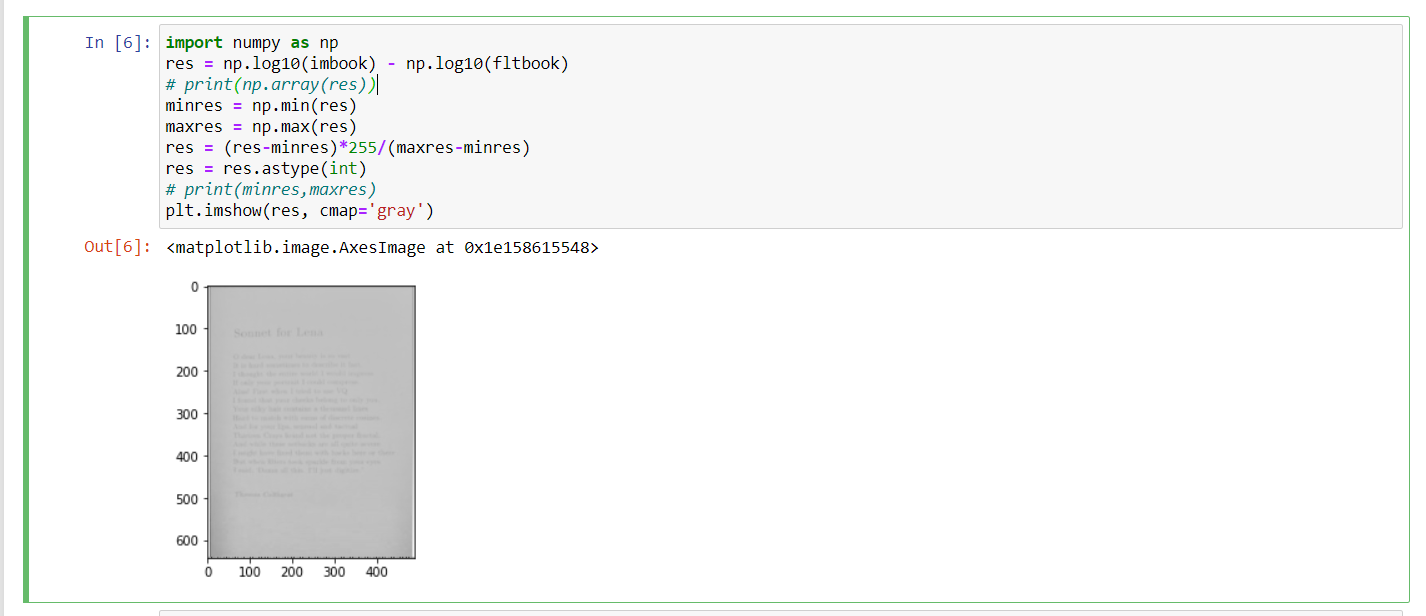